#  Titanic Dataset - Exploratory Data Analysis (EDA)

This notebook performs a detailed exploratory analysis of the Titanic dataset. The goal is to uncover patterns and relationships that influenced passenger survival.

We'll walk through:
- Data loading and inspection
- Univariate, bivariate, and multivariate analysis
- Handling missing values and skewness
- Feature engineering and recommendations

Let’s dive in!


##  Step 1: Import Required Libraries

We begin by importing essential Python libraries for data manipulation, visualization, and statistical analysis.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]


##  Step 2: Load the Titanic Dataset

We load the Titanic dataset using Pandas. This dataset contains details about passengers such as age, class, gender, and survival status.



In [5]:
# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\Srusti\Downloads\train.csv")


##  Step 3: Basic Data Exploration

We start by inspecting the dataset:
- Shape of the dataset (rows × columns)
- Preview of the first few rows
- Data types and non-null counts
- Summary statistics for numerical columns
- Missing value counts


In [6]:
# Dataset shape and preview
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Data types and memory usage
print("\nData Information:")
df.info()

# Summary statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

##  Step 4: Univariate Analysis - Categorical Features

We analyze the distribution of key categorical variables:
- Survival status
- Passenger class
- Gender
- Embarkation port

These visualizations help us understand the frequency and balance of categories.



Survival Distribution:
Survived
0    549
1    342
Name: count, dtype: int64


C:\Users\Srusti\AppData\Local\Temp\ipykernel_19512\2436440443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['red', 'green'])


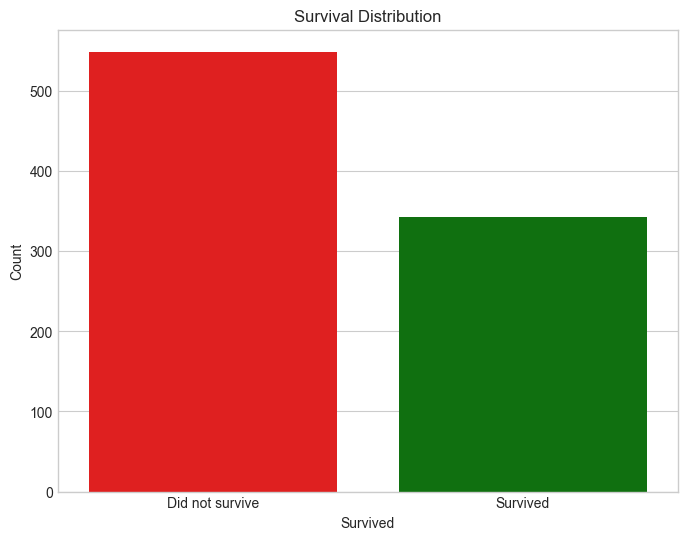


Passenger Class Distribution:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


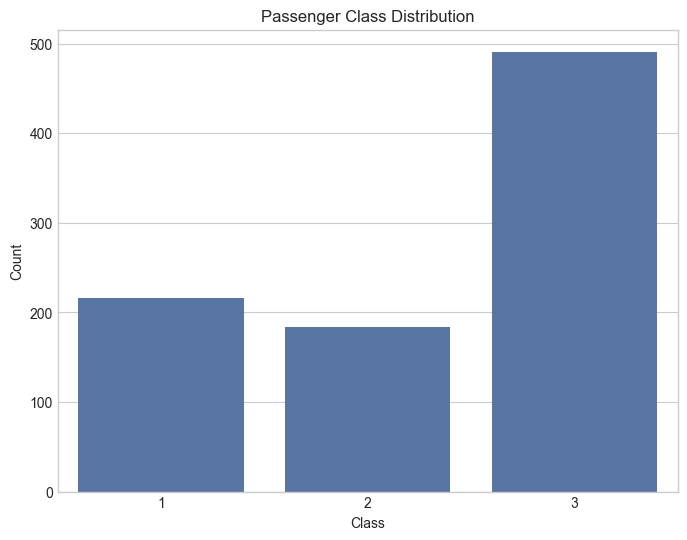


Gender Distribution:
Sex
male      577
female    314
Name: count, dtype: int64


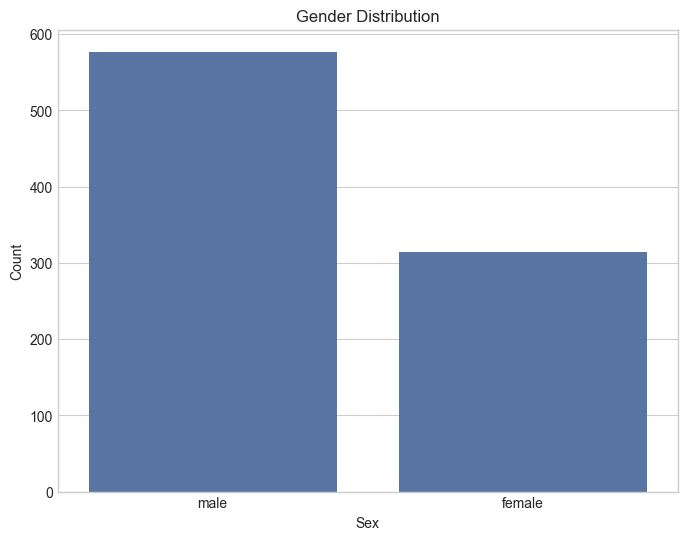


Embarkation Port Distribution:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


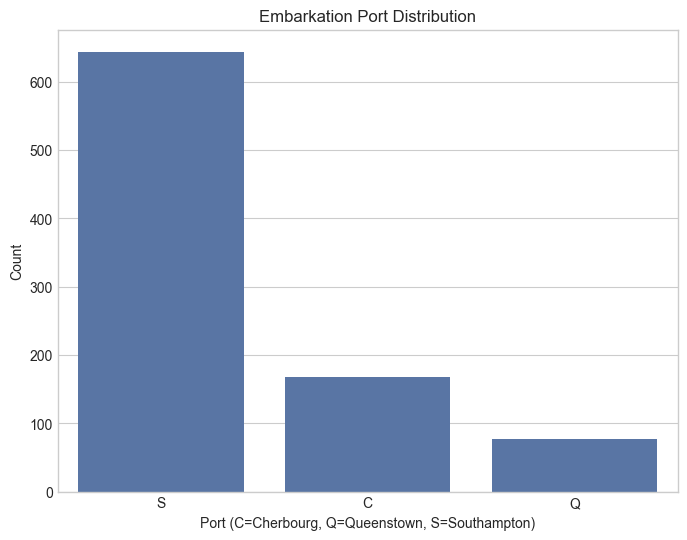

In [7]:
# Survival Distribution
print("\nSurvival Distribution:")
survival_counts = df['Survived'].value_counts()
print(survival_counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Distribution')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.ylabel('Count')
plt.show()

# Passenger Class Distribution
print("\nPassenger Class Distribution:")
print(df['Pclass'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Gender Distribution
print("\nGender Distribution:")
print(df['Sex'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

# Embarkation Port Distribution
print("\nEmbarkation Port Distribution:")
print(df['Embarked'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Embarkation Port Distribution')
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Count')
plt.show()


##  Step 5: Bivariate Analysis - Survival vs Categorical Features

Now we examine how survival rates differ across key categorical variables:

- **Passenger Class**: Does class affect survival?
- **Gender**: Were women more likely to survive?
- **Embarkation Port**: Did port of boarding influence survival?
- **Age Group**: Are children more likely to survive than adults?

These visualizations help uncover relationships between features and the target variable (`Survived`).


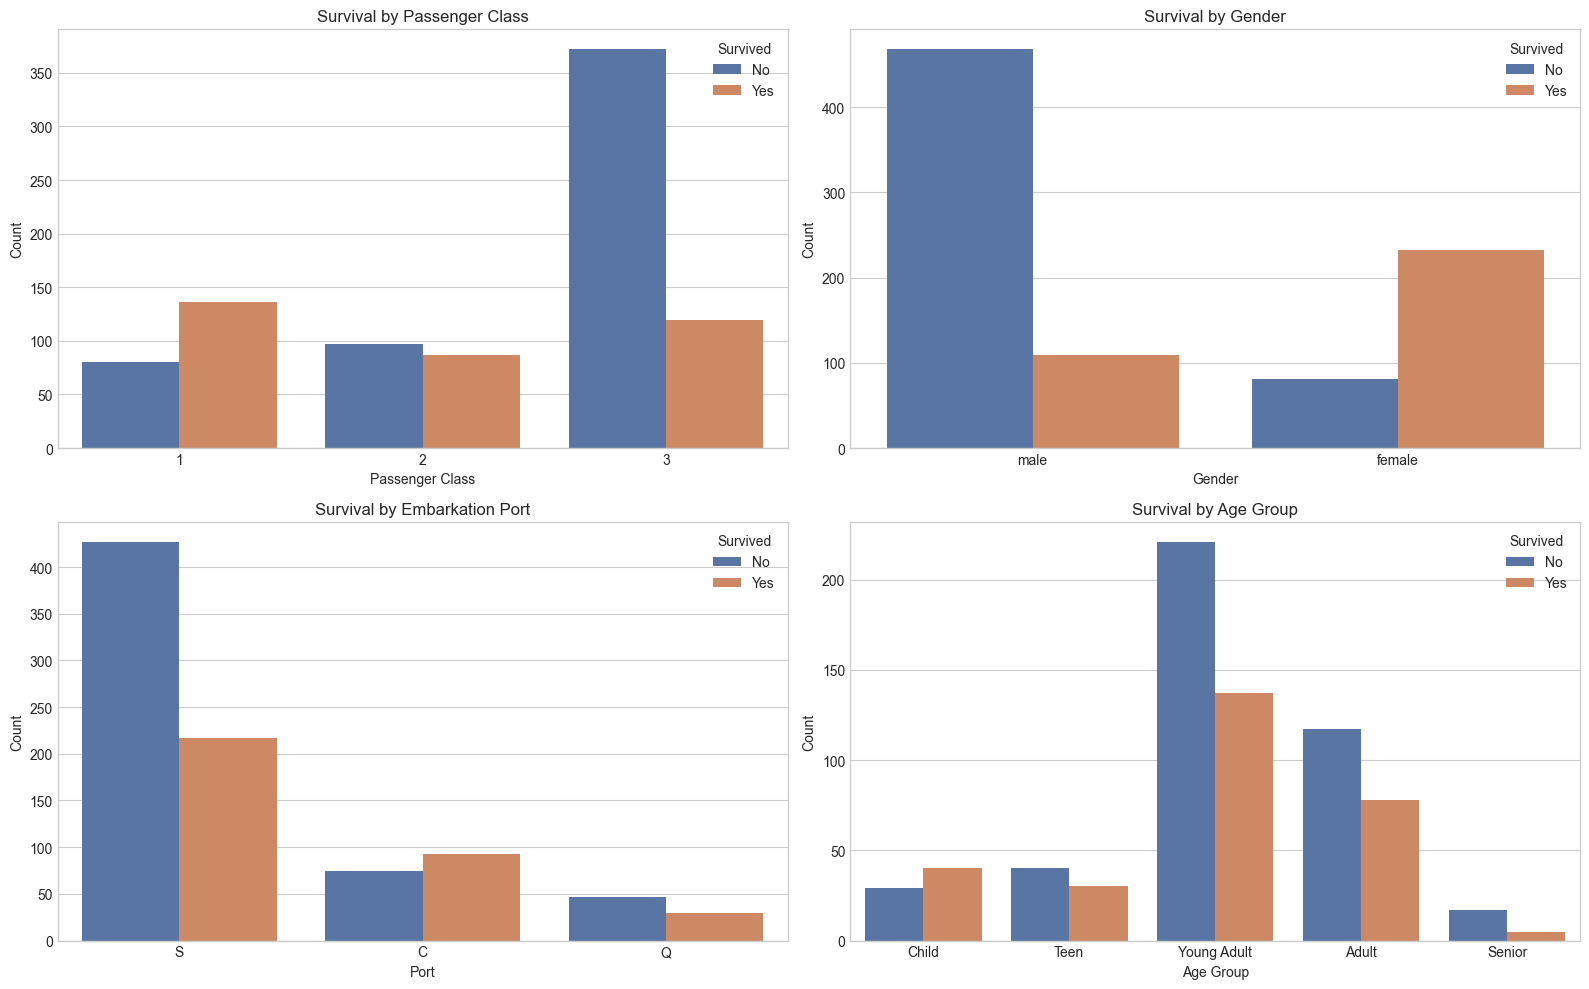

In [8]:
plt.figure(figsize=(16, 10))

# Survival by Passenger Class
plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Survival by Gender
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Survival by Embarkation Port
plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.xlabel('Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Survival by Age Group
plt.subplot(2, 2, 4)
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100],
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.countplot(x='Age_Group', hue='Survived', data=df)
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


##  Step 6: Bivariate Analysis - Survival vs Numerical Features

We now compare the distributions of numerical variables across survival status:

- **Age**: Are younger passengers more likely to survive?
- **Fare**: Did passengers who paid higher fares have better survival chances?

Boxplots are used to visualize the spread and central tendency of these variables by survival.


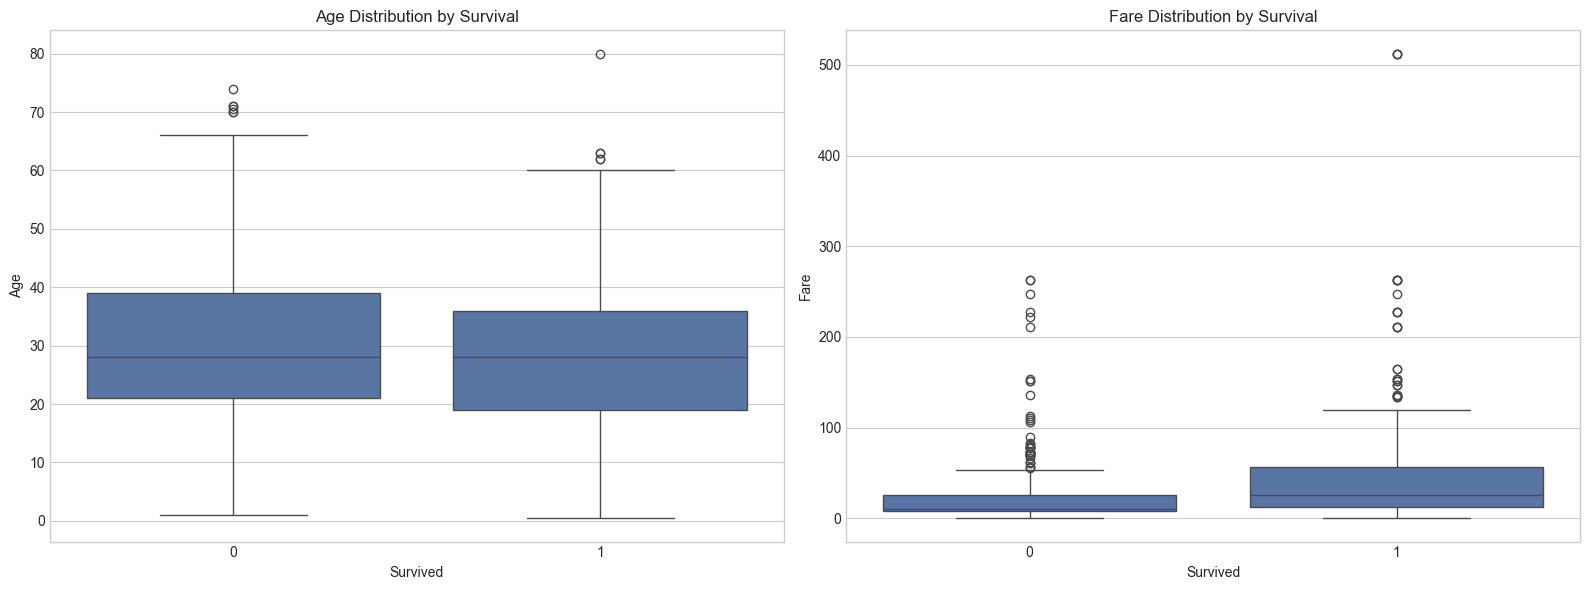

In [9]:
plt.figure(figsize=(16, 6))

# Age vs Survival
plt.subplot(1, 2, 1)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')

# Fare vs Survival
plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()


##  Step 7: Multivariate Analysis - Correlation & Pairplot

We now explore how numerical features relate to each other and to survival:

-  **Correlation Matrix**: Shows linear relationships between numerical variables.
-  **Pairplot**: Visualizes pairwise distributions and survival patterns.

These tools help identify multicollinearity and feature interactions.


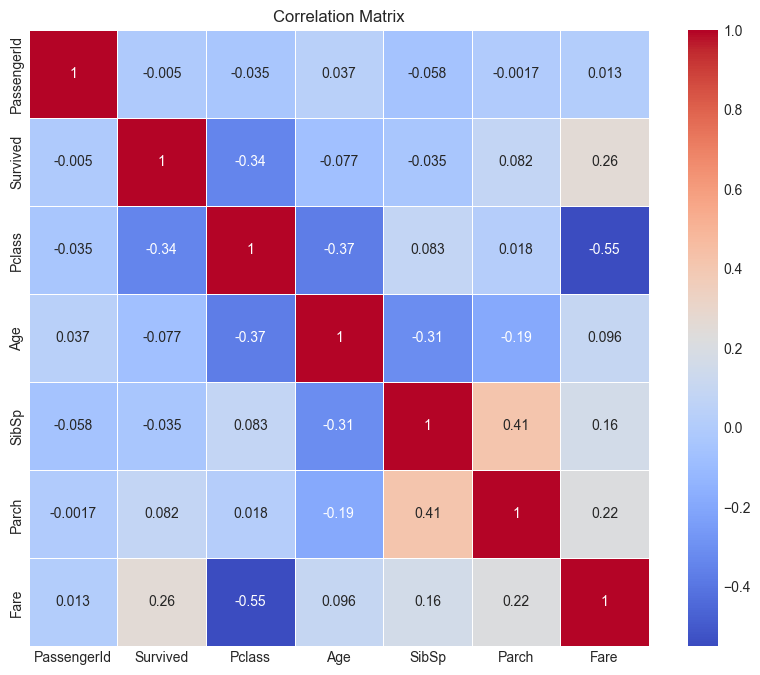

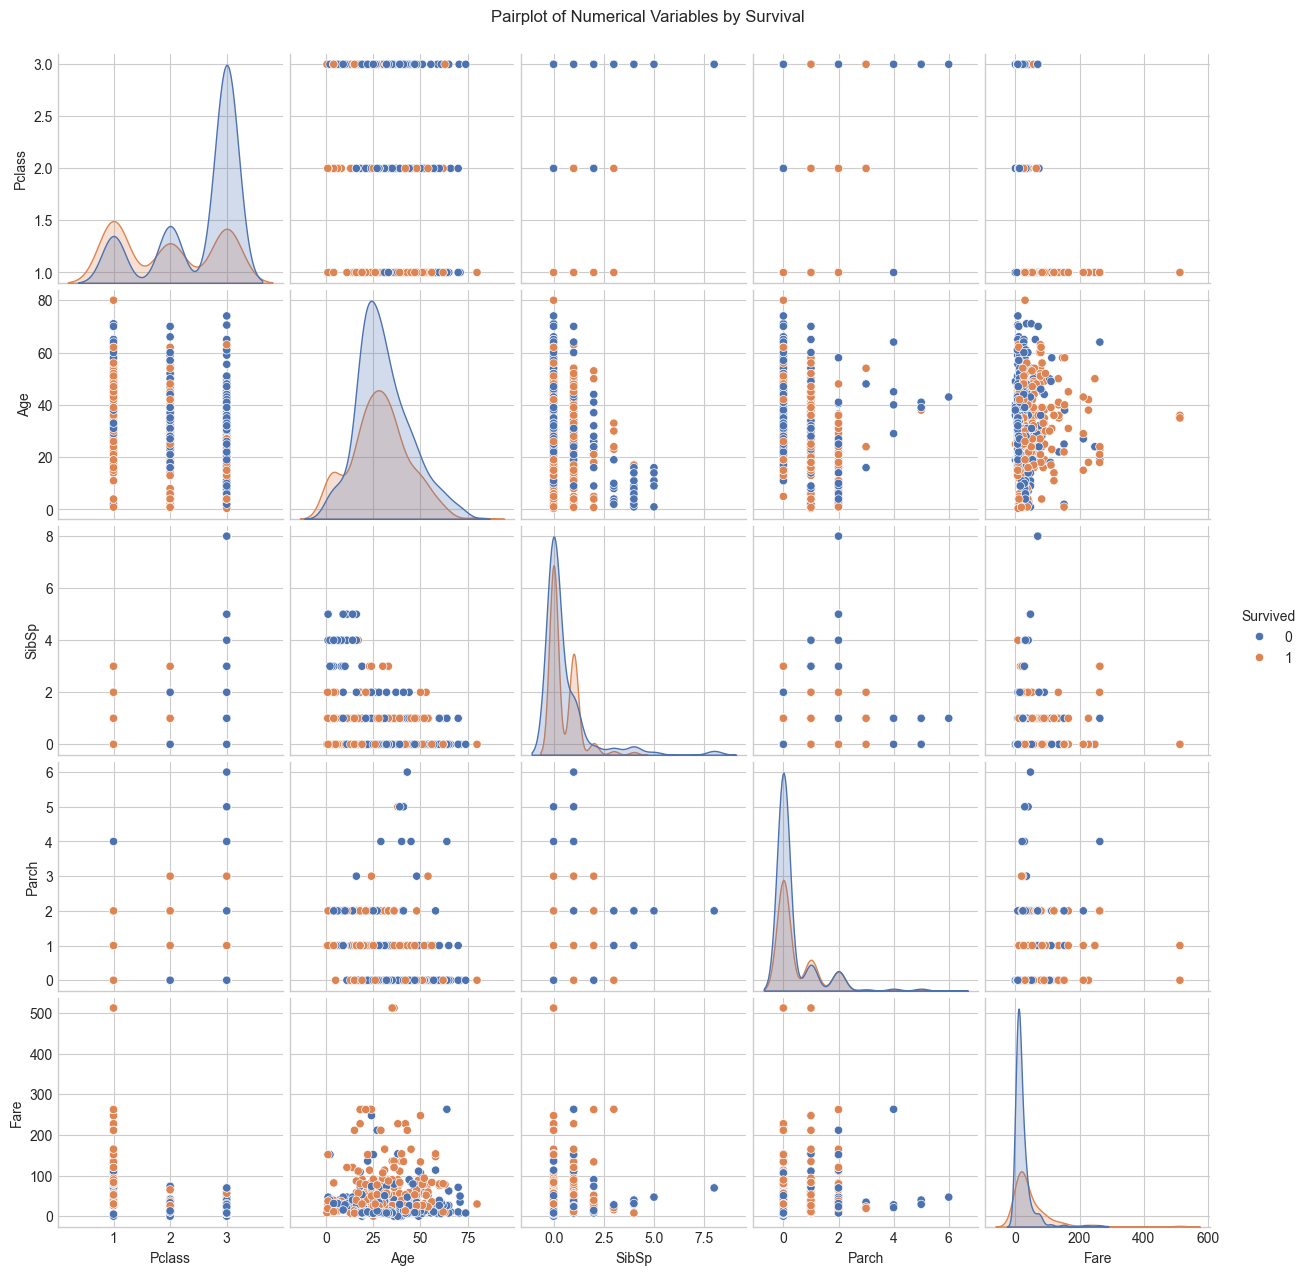

In [10]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairplot of numerical features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived')
plt.suptitle('Pairplot of Numerical Variables by Survival', y=1.02)
plt.show()


##  Step 8: Survival by Class and Gender

We now examine how survival varies when combining two categorical variables:
- **Passenger Class** and **Gender**

This bar plot helps us understand how gender and class together influenced survival chances.


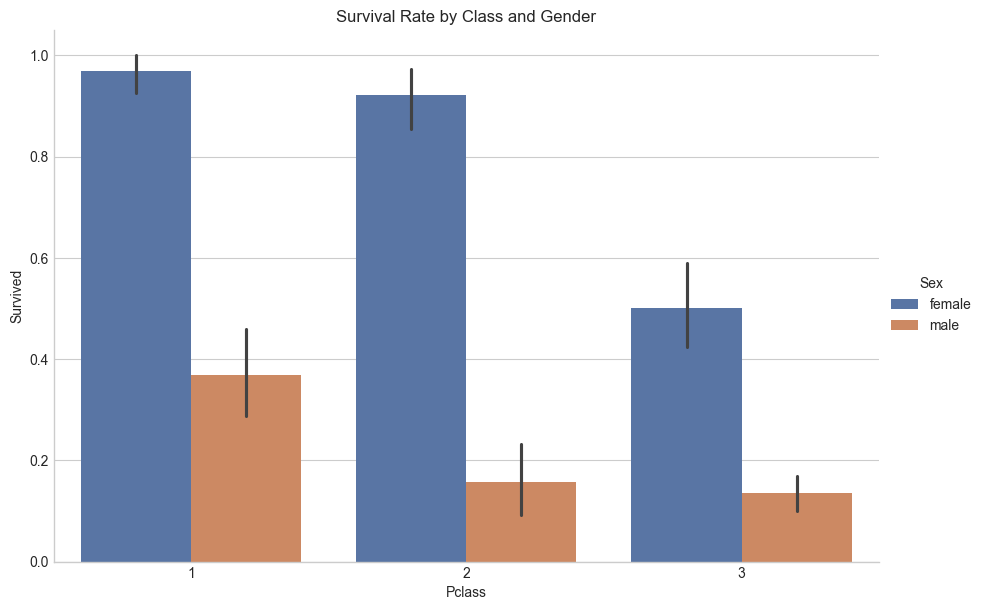

In [11]:
# Survival by Class and Gender
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df, height=6, aspect=1.5)
plt.title('Survival Rate by Class and Gender')
plt.show()


##  Step 9: Handling Missing Values

Before modeling, we need to assess and address missing data:

- `Age`: 177 missing values (~20%)
- `Cabin`: 687 missing values (~77%) — likely to be dropped or heavily imputed
- `Embarked`: 2 missing values — can be filled with mode

We calculate both the count and percentage of missing values.


In [12]:
# Missing Values Analysis
print("\nMissing Values Analysis:")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Count', 'Missing Percent'])
print(missing_data[missing_data['Missing Count'] > 0])



Missing Values Analysis:
           Missing Count  Missing Percent
Cabin                687        77.104377
Age                  177        19.865320
Age_Group            177        19.865320
Embarked               2         0.224467


##  Step 10: Skewness Analysis of Numerical Features

We check the skewness of numerical variables to identify non-normal distributions:

- Positive skew: Long tail on the right
- Negative skew: Long tail on the left

We also visualize each variable’s distribution and Q-Q plot to assess normality.



Skewness Analysis:
Age is positively skewed: 0.3891


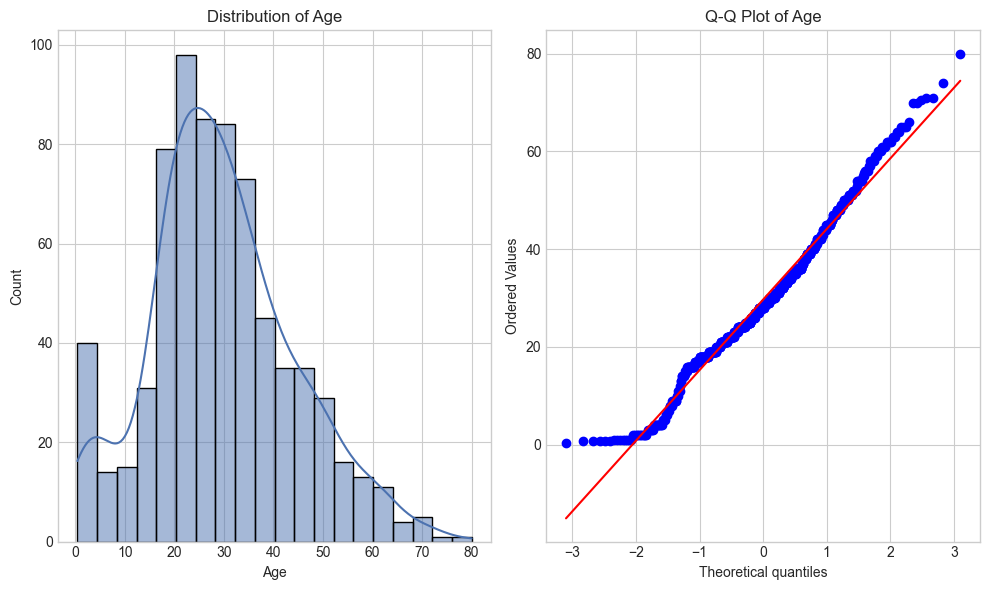

Fare is positively skewed: 4.7873


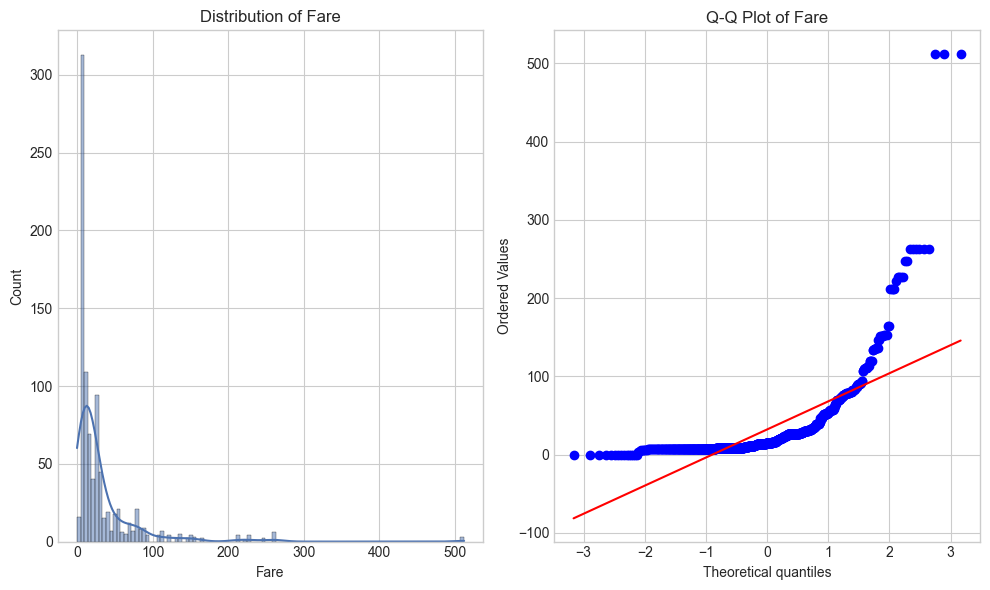

SibSp is positively skewed: 3.6954


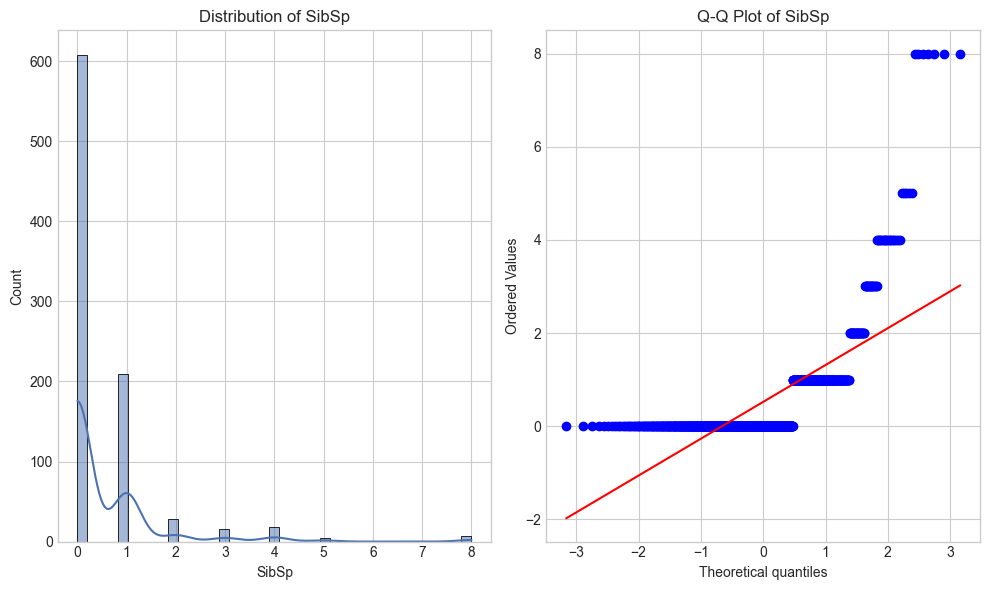

Parch is positively skewed: 2.7491


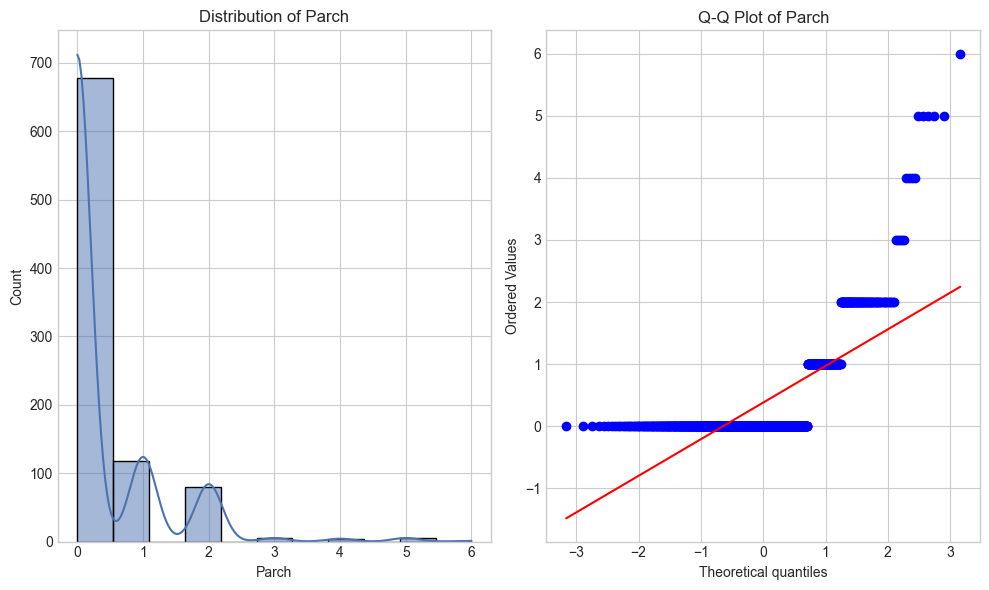

In [13]:
# Skewness check and visualization
print("\nSkewness Analysis:")
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    skewness = df[col].skew()
    if skewness > 0:
        print(f"{col} is positively skewed: {skewness:.4f}")
    elif skewness < 0:
        print(f"{col} is negatively skewed: {skewness:.4f}")
    else:
        print(f"{col} is normally distributed: {skewness:.4f}")
        
    # Visualize the skewness
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    
    plt.tight_layout()
    plt.show()


##  Step 11: Transforming Skewed Data

Highly skewed variables can distort model predictions. We apply transformations to normalize them:

- **Log Transformation**: Compresses large values
- **Square Root Transformation**: Smooths moderate skew

We demonstrate this on the `Fare` variable, which is strongly right-skewed.



Transforming Skewed Variables:


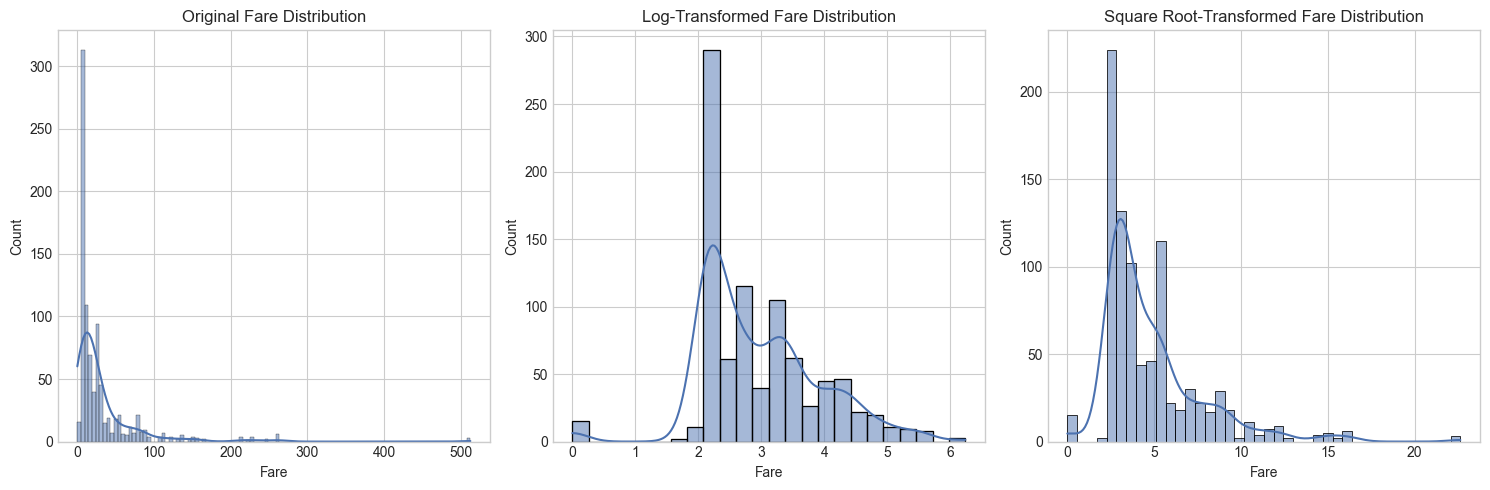

In [14]:
# Transforming Fare variable
print("\nTransforming Skewed Variables:")
plt.figure(figsize=(15, 5))

# Original Fare
plt.subplot(1, 3, 1)
sns.histplot(df['Fare'], kde=True)
plt.title('Original Fare Distribution')

# Log-transformed Fare
plt.subplot(1, 3, 2)
sns.histplot(np.log1p(df['Fare']), kde=True)
plt.title('Log-Transformed Fare Distribution')

# Square root-transformed Fare
plt.subplot(1, 3, 3)
sns.histplot(np.sqrt(df['Fare']), kde=True)
plt.title('Square Root-Transformed Fare Distribution')

plt.tight_layout()
plt.show()


##  Step 12: Detecting Multicollinearity

Multicollinearity occurs when features are highly correlated, which can confuse models.

We use the correlation matrix to identify pairs with correlation coefficient |r| > 0.5.


In [15]:
# Multicollinearity Detection
print("\nMulticollinearity Detection:")
high_corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.5:  # Threshold of 0.5
            high_corr_pairs.append((correlation.columns[i], correlation.columns[j], correlation.iloc[i, j]))

print("Highly correlated pairs (|r| > 0.5):")
for var1, var2, corr in high_corr_pairs:
    print(f"{var1} and {var2}: {corr:.4f}")



Multicollinearity Detection:
Highly correlated pairs (|r| > 0.5):
Fare and Pclass: -0.5495


##  Step 13: Feature Engineering

We create new features to enrich the dataset:

- **FamilySize**: Total number of family members aboard (SibSp + Parch + 1)
- **IsAlone**: Binary indicator for passengers traveling alone

These features help capture social dynamics that may influence survival.


Family Size Distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


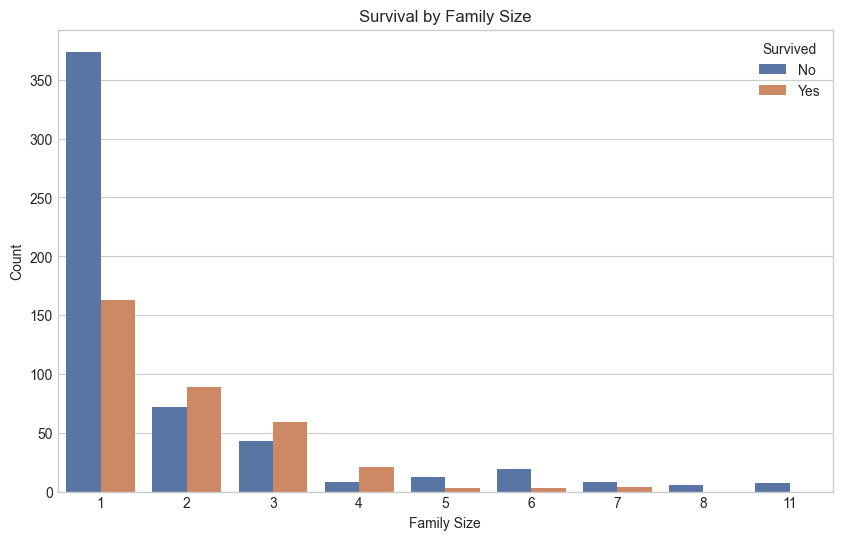


Traveling Alone vs With Family:
IsAlone
1    537
0    354
Name: count, dtype: int64


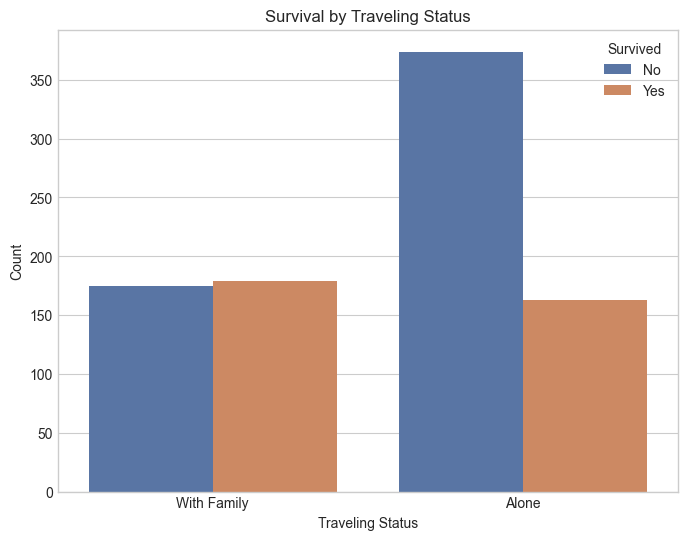

In [16]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("Family Size Distribution:")
print(df['FamilySize'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# IsAlone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print("\nTraveling Alone vs With Family:")
print(df['IsAlone'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title('Survival by Traveling Status')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.xlabel('Traveling Status')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


Family Size Distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


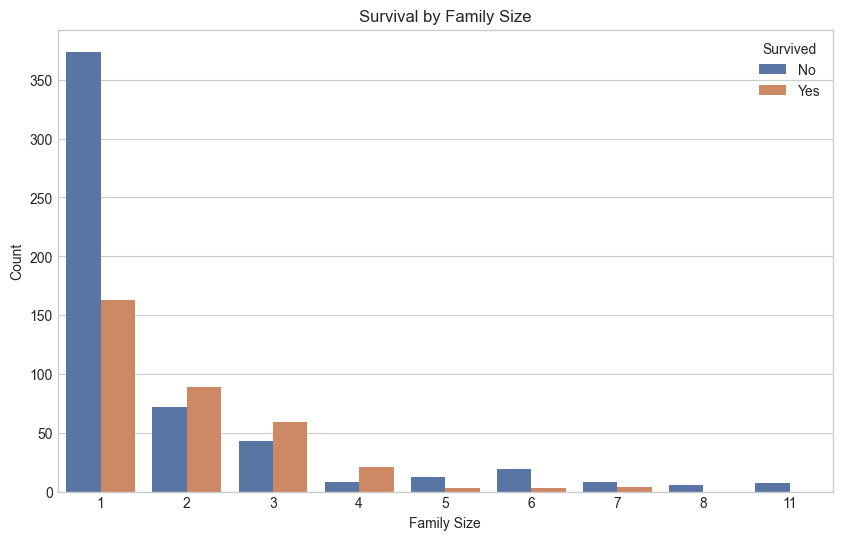


Traveling Alone vs With Family:
IsAlone
1    537
0    354
Name: count, dtype: int64


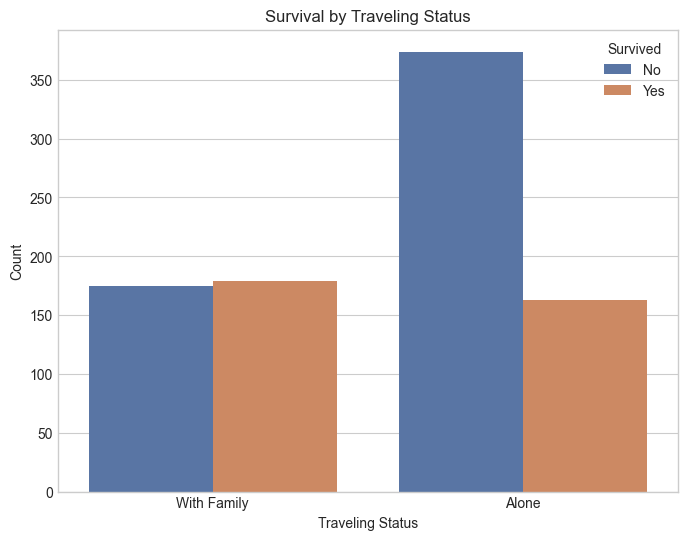

In [17]:
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("Family Size Distribution:")
print(df['FamilySize'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# IsAlone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print("\nTraveling Alone vs With Family:")
print(df['IsAlone'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title('Survival by Traveling Status')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.xlabel('Traveling Status')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


##  Step 14: Summary of EDA Findings

Here’s a concise summary of key insights:

### 1. Dataset Overview
- 891 passengers, 12 features
- Survival rate: **38.4%**
- Missing values in `Age`, `Cabin`, and `Embarked`

### 2. Demographic Insights
- More males (577) than females (314)
- Females had a significantly higher survival rate
- 3rd class had the most passengers but lowest survival rate
- Mean age: ~29.7 years; many children under 18

### 3. Survival Factors
- **Gender** and **Class** were strong predictors
- **Children** had better survival rates than adults
- **Traveling alone** reduced survival chances

### 4. Statistical Observations
- `Fare` is highly skewed → log transformation recommended
- `Age` needs imputation
- `Pclass` and `Fare` are correlated → socioeconomic status matters

### 5. Recommendations for Further Analysis
- Impute missing `Age` using `Pclass`, `Fare`, and extracted `Title`
- Extract titles from names for richer features
- Use ensemble models to handle mixed data types
- Engineer features around family and social status
